# 테스트를 해봅시다~

## 이미지 전처리

In [2]:
import os
import cv2
import numpy as np

def preprocess_images(folder_path, target_size=160):
    """
    특정 폴더 안의 이미지를 전처리하여 NumPy 배열로 반환.
    - 이미지 리사이징 (최대 길이 160)
    - 검정색 패딩을 추가하여 160x160 크기로 맞춤.
    
    Args:
        folder_path (str): 이미지가 저장된 폴더 경로.
        target_size (int): 최종 이미지 크기 (정사각형, 기본값 160).
    
    Returns:
        np.ndarray: 전처리된 이미지 배열. (n, target_size, target_size, 3)
    """
    processed_images = []

    # 폴더 안의 모든 파일 확인
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # 이미지 읽기
        image = cv2.imread(file_path)
        if image is None:
            print(f"Skipping {filename}: Not a valid image.")
            continue
        
        # 이미지 크기 가져오기
        h, w, c = image.shape
        
        # 리사이징: 가장 긴 쪽이 target_size가 되도록 비율 유지
        if h > w:
            scale = target_size / h
        else:
            scale = target_size / w
        
        resized_h, resized_w = int(h * scale), int(w * scale)
        resized_image = cv2.resize(image, (resized_w, resized_h))

        # 패딩 추가: 160x160으로 중앙 정렬
        top = (target_size - resized_h) // 2
        bottom = target_size - resized_h - top
        left = (target_size - resized_w) // 2
        right = target_size - resized_w - left
        
        padded_image = cv2.copyMakeBorder(
            resized_image, top, bottom, left, right,
            borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]
        )
        
        # 결과 추가
        processed_images.append(padded_image)
    
    # NumPy 배열로 변환
    return np.array(processed_images, dtype='float32') / 255.0  # 정규화

In [3]:
# 사용 예시
folder_path = "C:\\Users\\User\\Desktop\\Python\\photofinder\\data\\test_images"
processed_array = preprocess_images(folder_path)

print(f"Processed Images Shape: {processed_array.shape}")


Processed Images Shape: (12, 160, 160, 3)


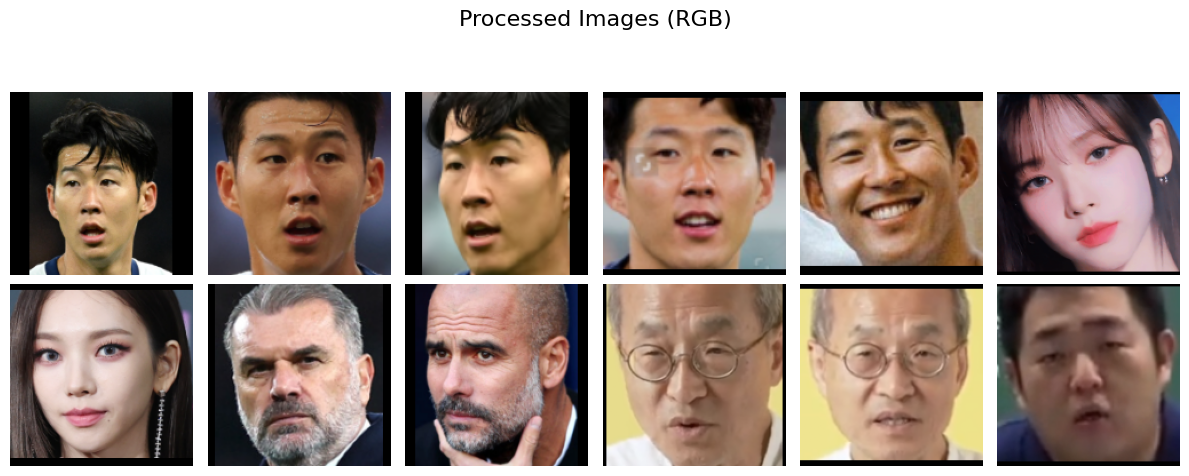

In [5]:
import matplotlib.pyplot as plt

# 이미지를 두 줄로 시각화 (6장씩)
plt.figure(figsize=(12, 5))
for i in range(12):  # 12장의 이미지를 표시
    plt.subplot(2, 6, i + 1)  # 2행 6열 그리드, i+1번째 칸
    
    # BGR을 RGB로 변환 (OpenCV에서 읽은 이미지는 기본적으로 BGR)
    img_rgb = processed_array[i][:, :, ::-1]  # 채널 순서를 BGR → RGB로 변환
    
    plt.imshow(img_rgb)  # RGB 이미지 표시
    plt.axis('off')  # 축 제거

# 전체 레이아웃 조정 및 제목 추가
plt.suptitle("Processed Images (RGB)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 조정
plt.show()


In [7]:
np.save("C:\\Users\\User\\Desktop\\Python\\photofinder\\data/test_datas/processed_images.npy", processed_array)

### facenet 벡터화

In [8]:
tester = np.load("C:\\Users\\User\\Desktop\\Python\\photofinder\\data/test_datas/emb_array.npy")

In [10]:
tester.shape

(12, 128)

In [11]:
from keras.models import load_model

In [13]:
model = load_model("C:/Users/User/Desktop/Python/photofinder/son_finder_model.h5")

In [17]:
pred = model.predict(tester)
# 예측값 해석: 0.5 이상이면 클래스 1, 미만이면 클래스 0
predicted_classes = (pred >= 0.5).astype(int)

# 결과 출력
for i, (pred, cls) in enumerate(zip(pred, predicted_classes), 1):
    print(f"Sample {i}: Predicted probability = {pred[0]:.2f}, Predicted class = {cls[0]}")

1/1 [==============================] - 0s 19ms/step
Sample 1: Predicted probability = 1.00, Predicted class = 1
Sample 2: Predicted probability = 1.00, Predicted class = 1
Sample 3: Predicted probability = 1.00, Predicted class = 1
Sample 4: Predicted probability = 1.00, Predicted class = 1
Sample 5: Predicted probability = 1.00, Predicted class = 1
Sample 6: Predicted probability = 0.00, Predicted class = 0
Sample 7: Predicted probability = 0.00, Predicted class = 0
Sample 8: Predicted probability = 0.00, Predicted class = 0
Sample 9: Predicted probability = 0.00, Predicted class = 0
Sample 10: Predicted probability = 0.00, Predicted class = 0
Sample 11: Predicted probability = 0.00, Predicted class = 0
Sample 12: Predicted probability = 0.00, Predicted class = 0


1/1 [==============================] - 0s 16ms/step


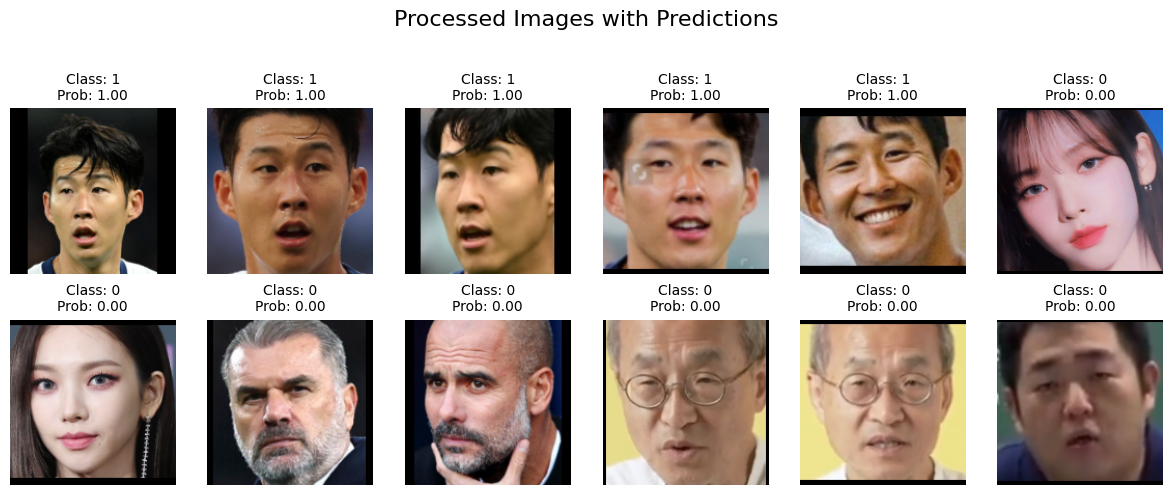

In [21]:
import matplotlib.pyplot as plt

# 모델 예측값 (확률)과 클래스 해석
predictions = model.predict(tester)
predicted_classes = (predictions >= 0.5).astype(int)

# 사진과 결과를 함께 표시
plt.figure(figsize=(12, 5))
for i in range(12):  # 12장의 이미지를 표시
    plt.subplot(2, 6, i + 1)  # 2행 6열 그리드, i+1번째 칸
    
    # BGR을 RGB로 변환 (이미지 처리)
    img_rgb = processed_array[i][:, :, ::-1]  # BGR → RGB 변환
    plt.imshow(img_rgb)  # 이미지 표시
    plt.axis('off')  # 축 제거
    
    # 모델 예측 결과 표시
    pred_prob = predictions[i][0]  # 예측 확률
    pred_class = predicted_classes[i][0]  # 예측 클래스
    label = f"Class: {pred_class}\nProb: {pred_prob:.2f}"
    plt.title(label, fontsize=10)

# 조정
plt.subplots_adjust(hspace=0.8)
plt.suptitle("Processed Images with Predictions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 조정
plt.show()
